## About Dataset

## Data contains:

#### TV promotion budget (in million)
####    Social Media promotion budget (in million)
####    Radio promotion budget (in million)
####    Influencer: Whether the promotion collaborate with                   Mega, Macro, Nano, Micro influencer
####    Sales (in million)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv("./marketing.txt")
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [4]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


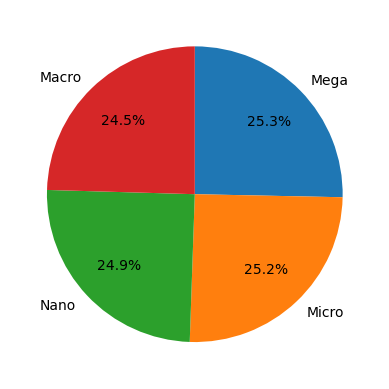

In [5]:
plt.pie(df['Influencer'].value_counts(),
   labels=df['Influencer'].unique(), counterclock=False, startangle=90,
   autopct='%1.1f%%', pctdistance=0.7)
plt.show()

#### According to pie chart , propotions of influencer are equivalent propotion

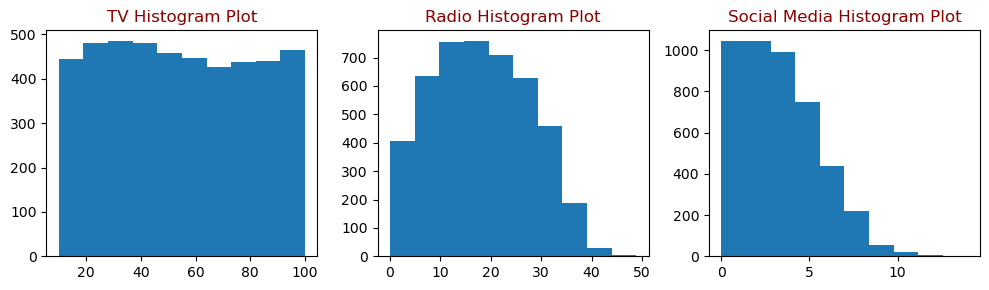

In [6]:
categorical_columns = ['TV', 'Radio', 'Social Media']

RP=plt.figure(figsize=(10,3))
for i, feature in enumerate(categorical_columns):
    r=RP.add_subplot(1,3,i+1)
    plt.hist(df[feature])
    r.set_title(feature+" Histogram Plot",color='DarkRed')
RP.tight_layout()  



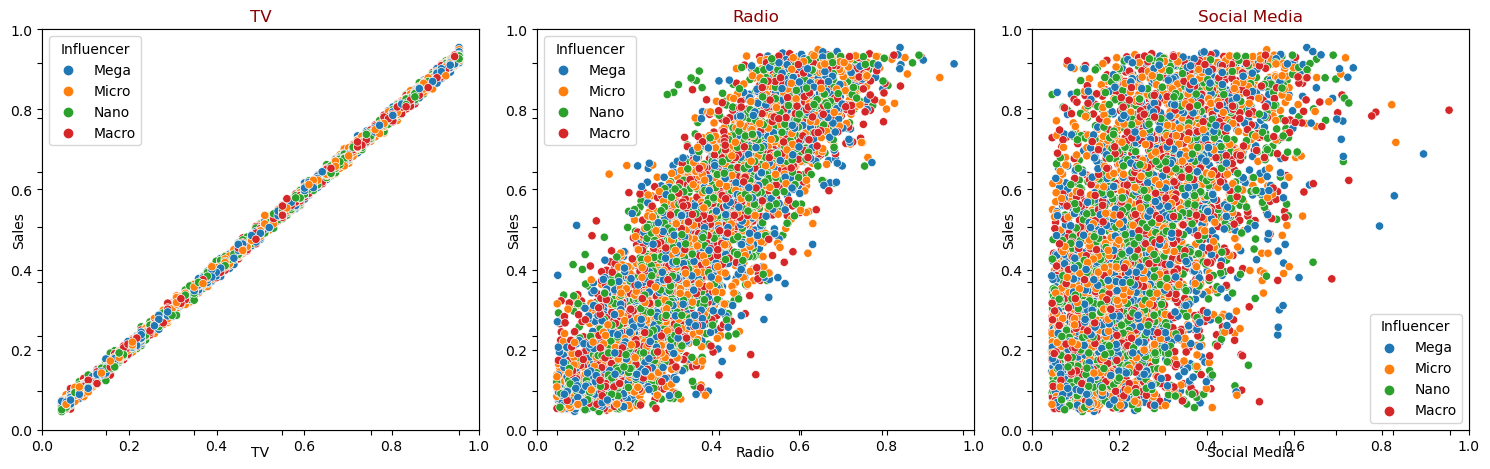

In [7]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
for idx,cat_col in enumerate(categorical_columns):
    r=fig.add_subplot(1,3,idx+1)
    grid = sns.scatterplot(data=df, x=cat_col, y='Sales', hue="Influencer")
    grid.set_xticklabels('') 
    grid.set_yticklabels('') 
    
    r.set_title(cat_col,color='DarkRed')
fig.tight_layout(rect=[0,0,1,0.96])  

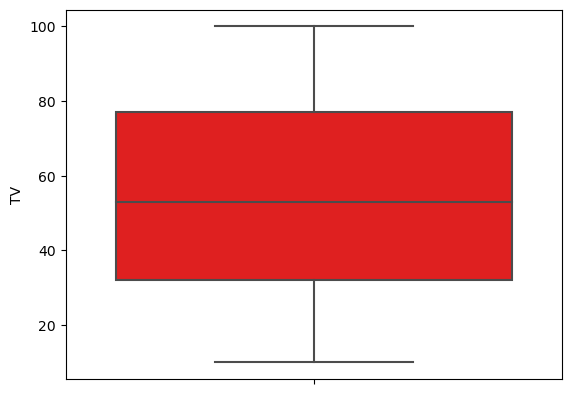

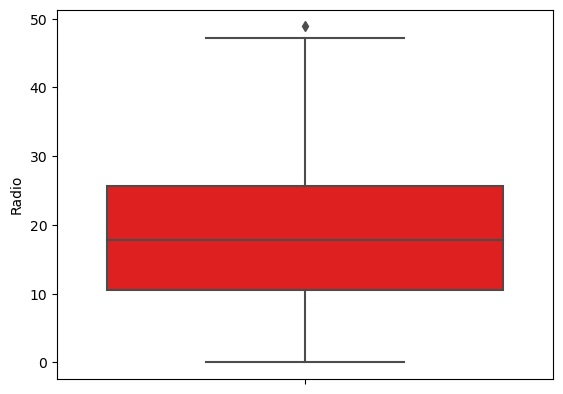

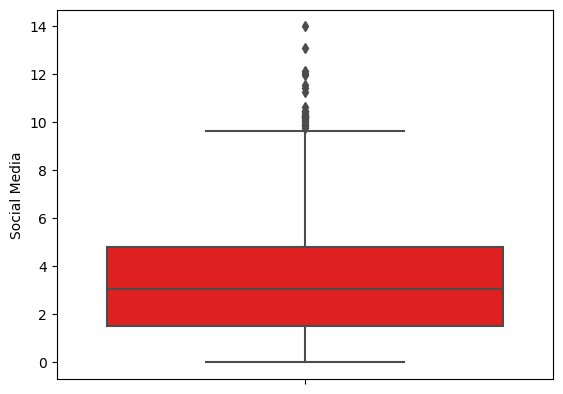

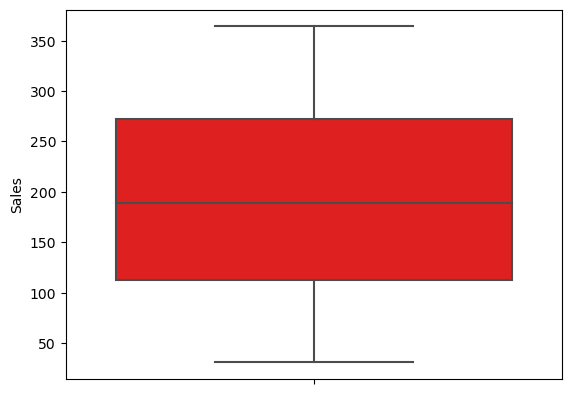

In [8]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

In [9]:
le=LabelEncoder()
df["Influencer"]=le.fit_transform(df["Influencer"])

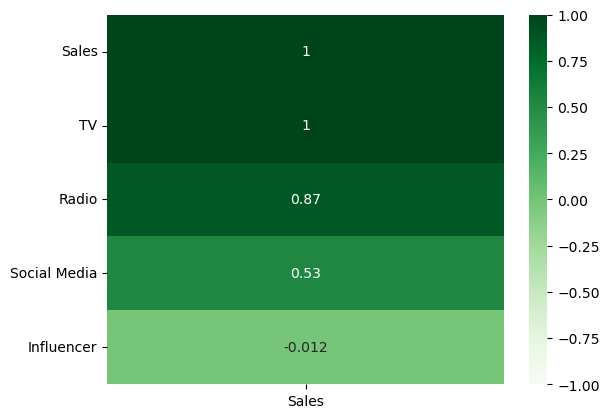

In [10]:
sns.heatmap(df.corr()[["Sales"]].sort_values(by="Sales", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

In [11]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
x=df.drop(columns=["Influencer","Sales"]).values
y=df[["Sales"]].values

In [14]:
x

array([[16.        ,  6.56623079,  2.90798277],
       [13.        ,  9.23776457,  2.4095672 ],
       [41.        , 15.88644602,  2.91341018],
       ...,
       [44.        , 19.80007236,  5.09619187],
       [71.        , 17.5346403 ,  1.94087322],
       [42.        , 15.96668752,  5.04654763]])

In [15]:
sc=StandardScaler()

In [16]:
x=sc.fit_transform(x)

In [17]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor()
}

In [18]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  2.9511969243641616
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  3.1149107593307575
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  2.9515510857398164
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  4.307695675857967
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  2.9881265078412875
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  4.476197125359528
************************************************

In [19]:
r=Ridge()

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
r.fit(x_train, y_train)

Ridge()

In [22]:
print("model trained with {}".format(r))
training_score = r.score(x_train, y_train)*100
testing_score = r.score(x_test, y_test)*100
score = r2_score(y_test, r.predict(x_test))*100
mae = mean_absolute_error(y_test, r.predict(x_test))
mse = mean_squared_error(y_test, r.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with Ridge()
r2score:  99.89895283299022
training_score:  99.8995694848744
testing_score:  99.89895283299022
mae:  2.3638996100165572
mse:  8.820253950735191
rmse_test:  2.9698912355059726


In [23]:
y_pred = r.predict(x)

In [24]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,54.732757,56.874411
1,46.677897,46.230006
2,150.177829,145.906231
3,298.246340,295.419062
4,56.594181,53.350698
...,...,...
4541,94.685866,92.461447
4542,249.101915,252.644509
4543,163.631457,156.589078
4544,253.610411,252.671540


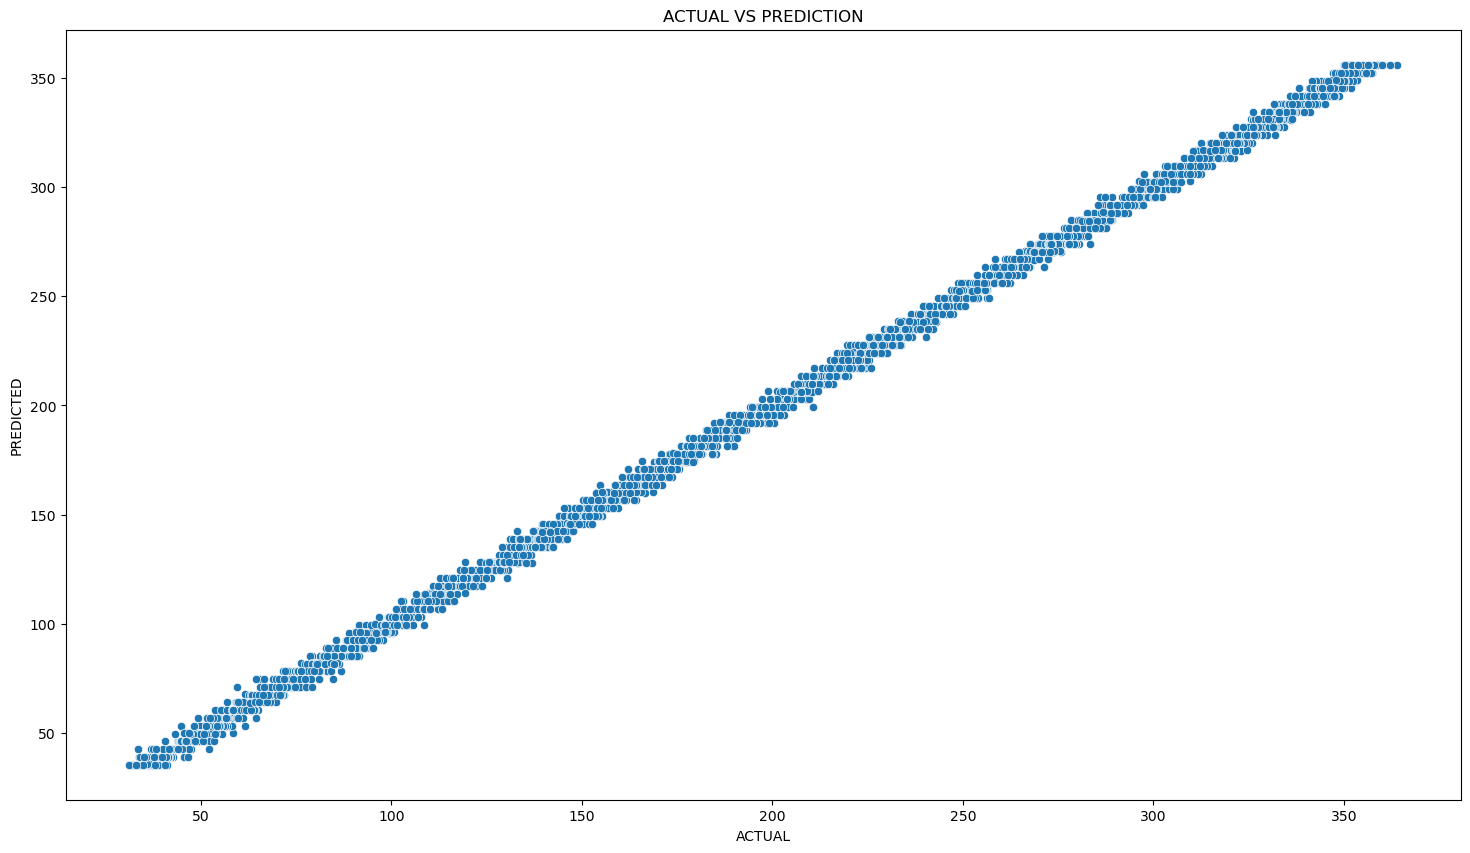

In [25]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()